<a href="https://www.kaggle.com/code/jlcordoba/mayo-clinic-strip-ai-svc?scriptVersionId=104177448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Please, upvote if you find the code useful :D***

if you want to apply SVC, delete # symbols

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [2]:
df_train = pd.read_csv('../input/mayo-clinic-strip-ai/train.csv')
df_train.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [3]:
import skimage.io as skio
im1 = skio.imread('../input/mayo-clinic-strip-ai/train/006388_0.tif')



In [4]:
len(im1)

60797

In [5]:
len(im1[0])

34007

In [6]:
len(im1)*len(im1[0])*len(im1[0][0])

6202570737

In [7]:
im1.size

6202570737

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


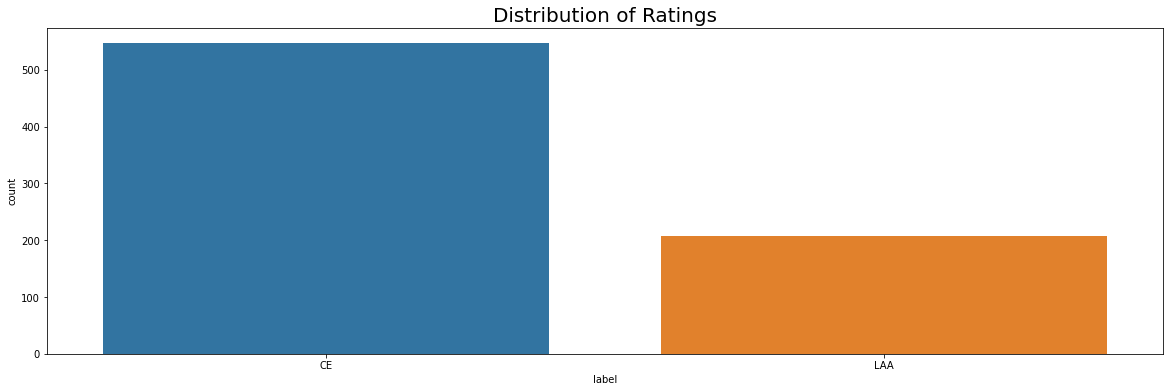

In [8]:
plt.figure(figsize=(20, 6))

sns.countplot(df_train['label'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


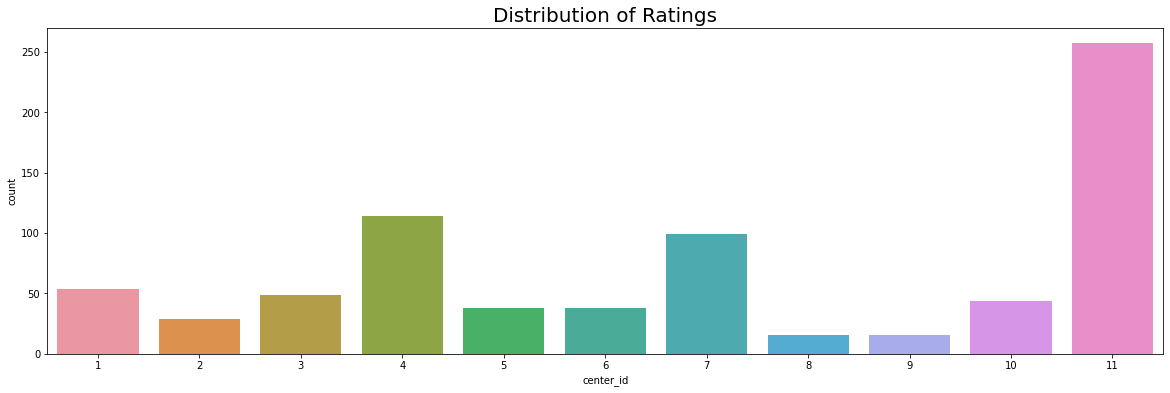

In [9]:
plt.figure(figsize=(20, 6))

sns.countplot(df_train['center_id'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


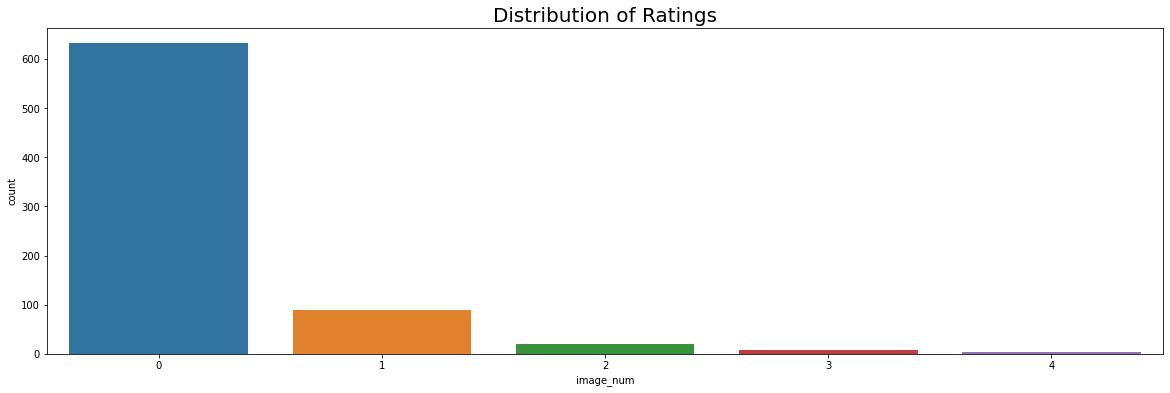

In [10]:
plt.figure(figsize=(20, 6))

sns.countplot(df_train['image_num'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

In [11]:
director = '../input/mayo-clinic-strip-ai/train'
case = os.listdir(director)
case
file_name = []
image_matrix = []


In [12]:
len(case)

754

In [13]:
df_other = df_train.copy()
df_other = pd.read_csv('../input/mayo-clinic-strip-ai/other.csv')
df_other.head()

,image_id,patient_id,image_num,other_specified,label
0,01f2b3_0,01f2b3,0,NaN,Unknown
1,01f2b3_1,01f2b3,1,NaN,Unknown
2,02ebd5_0,02ebd5,0,NaN,Unknown
3,0412ab_0,0412ab,0,NaN,Unknown
4,04414e_0,04414e,0,Hypercoagulable,Other


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


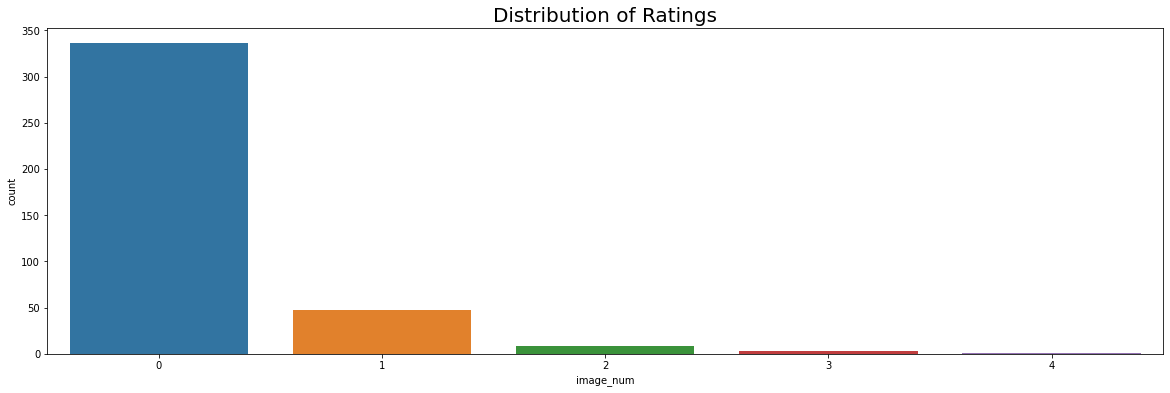

In [14]:
plt.figure(figsize=(20, 6))

sns.countplot(df_other['image_num'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


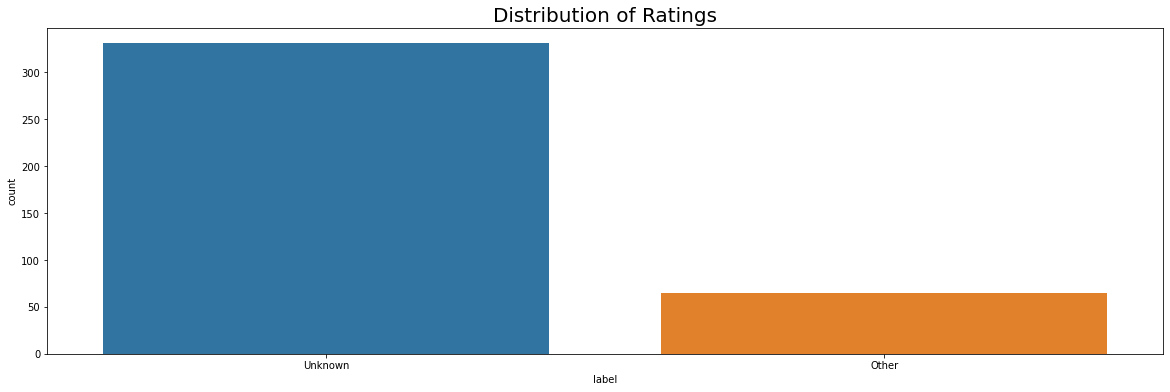

In [15]:
plt.figure(figsize=(20, 6))

sns.countplot(df_other['label'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


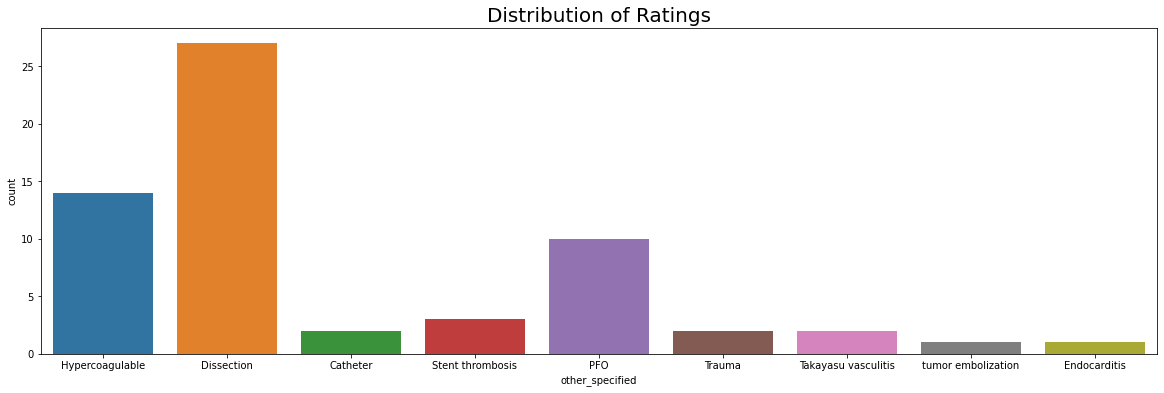

In [16]:
plt.figure(figsize=(20, 6))

sns.countplot(df_other['other_specified'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

In [17]:
sample_submission = df_train.copy()
sample_submission = pd.read_csv('../input/mayo-clinic-strip-ai/sample_submission.csv')
sample_submission.head()


,patient_id,CE,LAA
0,006388,0.5,0.5
1,008e5c,0.5,0.5
2,00c058,0.5,0.5
3,01adc5,0.5,0.5


In [18]:
test = df_train.copy()
test = pd.read_csv('../input/mayo-clinic-strip-ai/test.csv')
test.head()

,image_id,center_id,patient_id,image_num
0,006388_0,11,006388,0
1,008e5c_0,11,008e5c,0
2,00c058_0,11,00c058,0
3,01adc5_0,11,01adc5,0


In [19]:
k=0
label = []
for i in case[0:20]:
    im1 = []
    directory_ = '../input/mayo-clinic-strip-ai/train/'
    imagenes = os.listdir(directory_)
    label.append(df_train['label'][k])
    k = k+1
    im1 = skio.imread('../input/mayo-clinic-strip-ai/train/'+ i)
    res = cv2.resize(im1, dsize=(1700, 3040), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(df_train['patient_id'][k-1]+'.jpg', res)

In [20]:
print(df_train['label'].index)
labels = []
for i in range(len(df_train['label'])):
    labels.append(df_train['label'][i])
print(labels)
labels_code = []
for i in labels:
    labels_code.append(labels.index(i))
    
    

RangeIndex(start=0, stop=754, step=1)
['CE', 'CE', 'LAA', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'L

***SUPPORT VECTOR CLASSIFIER*** (select code lines and press Ctrl+/ to eliminate # symbols)

In [21]:
# import pandas as pd
# import os
# from skimage.transform import resize
# from skimage.io import imread
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio.v3 as iio
# import imghdr
# Categories=['CE','LAA']
# flat_data_arr=[] 
# target_arr=[] 
# datadir='./' 

# path=datadir
# for img in os.listdir(path):
#     if imghdr.what(img)=='jpeg':
#         print(img)
    

In [22]:

# k=0
# label = []
# for i in case[0:200]:
#     im1 = []
#     directory_ = '../input/mayo-clinic-strip-ai/train/'
#     imagenes = os.listdir(directory_)
#     label.append(df_train['label'][k])
#     k = k+1
#     im1 = skio.imread('../input/mayo-clinic-strip-ai/train/'+ i)
#     res = cv2.resize(im1, dsize=(1700, 3040), interpolation=cv2.INTER_CUBIC)
#     cv2.imwrite(df_train['patient_id'][k-1]+'.jpg', res)


In [23]:

# label = []
# for i in case[200:400]:
#     im1 = []
#     directory_ = '../input/mayo-clinic-strip-ai/train/'
#     imagenes = os.listdir(directory_)
#     label.append(df_train['label'][k])
#     k = k+1
#     im1 = skio.imread('../input/mayo-clinic-strip-ai/train/'+ i)
#     res = cv2.resize(im1, dsize=(1700, 3040), interpolation=cv2.INTER_CUBIC)
#     cv2.imwrite(df_train['patient_id'][k-1]+'.jpg', res)


In [24]:

# label = []
# for i in case[400:600]:
#     im1 = []
#     directory_ = '../input/mayo-clinic-strip-ai/train/'
#     imagenes = os.listdir(directory_)
#     label.append(df_train['label'][k])
#     k = k+1
#     im1 = skio.imread('../input/mayo-clinic-strip-ai/train/'+ i)
#     res = cv2.resize(im1, dsize=(1700, 3040), interpolation=cv2.INTER_CUBIC)
#     cv2.imwrite(df_train['patient_id'][k-1]+'.jpg', res)


In [25]:

# label = []
# for i in case[600:754]:
#     im1 = []
#     directory_ = '../input/mayo-clinic-strip-ai/train/'
#     imagenes = os.listdir(directory_)
#     label.append(df_train['label'][k])
#     k = k+1
#     im1 = skio.imread('../input/mayo-clinic-strip-ai/train/'+ i)
#     res = cv2.resize(im1, dsize=(1700, 3040), interpolation=cv2.INTER_CUBIC)
#     cv2.imwrite(df_train['patient_id'][k-1]+'.jpg', res)
    

In [26]:
# import pandas as pd
# import os
# from skimage.transform import resize
# from skimage.io import imread
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio.v3 as iio
# Categories=['CE','LAA']
# flat_data_arr=[] 
# target_arr=[] 
# datadir='./' 

# path=datadir
# for img in os.listdir(path):
#     print(img)
#     if imghdr.what(img)=='jpeg':
#         print(img)
#         img_array=skio.imread(path + img)
#         img_array=iio.imread(img)
#         img_resized=resize(img_array,(150,150,3))
#         flat_data_arr.append(img_resized.flatten())
# flat_data=np.array(flat_data_arr)
# target=np.array(labels_code)
# df=pd.DataFrame(flat_data) 
# df.head()
# df['Target']=target
        
# x=df.iloc[:,:-1] 
# y=df.iloc[:,-1] 

In [27]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=svm.SVC(probability=True)
# model=GridSearchCV(svc,param_grid)

In [28]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
# print('Splitted Successfully')
# model.fit(x_train,y_train)
# print('The Model is trained well with the given images')


In [29]:
# from sklearn.metrics import accuracy_score
# y_pred=model.predict(x_test)
# print("The predicted Data is :")
# print(y_pred)
# print("The actual data is:")
# print(np.array(y_test))
# print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

# ***Working in progress :D***